In [1]:
import gc
import keras

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
data = np.load(r'C:\Users\dpetr\Desktop\sxoli\Level 3\Individual\datasets\GTZAN\features.npz')
labels = data['labels']

In [3]:
mel = data['mel']
print(mel.shape, mel.dtype, labels.shape, labels.dtype)

(9986, 128, 130) float32 (9986,) int32


In [3]:
mfcc = data['mfcc']
print(mfcc.shape, mfcc.dtype, labels.shape, labels.dtype)

(9986, 20, 130) float32 (9986,) int32


In [5]:
def prepare_datasets(x, y, test_size, validation_size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=validation_size, stratify=y_train)
    return x_train, x_test, x_validation, y_train, y_test, y_validation

x_train, x_test, x_validation, y_train, y_test, y_validation = prepare_datasets(mel, labels, test_size=1500, validation_size=1500)

In [6]:
print("X shape: ", x_train.shape, x_validation.shape, x_test.shape)
print("Y shape: ", y_train.shape, y_validation.shape, y_test.shape)

X shape:  (6986, 128, 130) (1500, 128, 130) (1500, 128, 130)
Y shape:  (6986,) (1500,) (1500,)


Text(0, 0.5, 'Frequency')

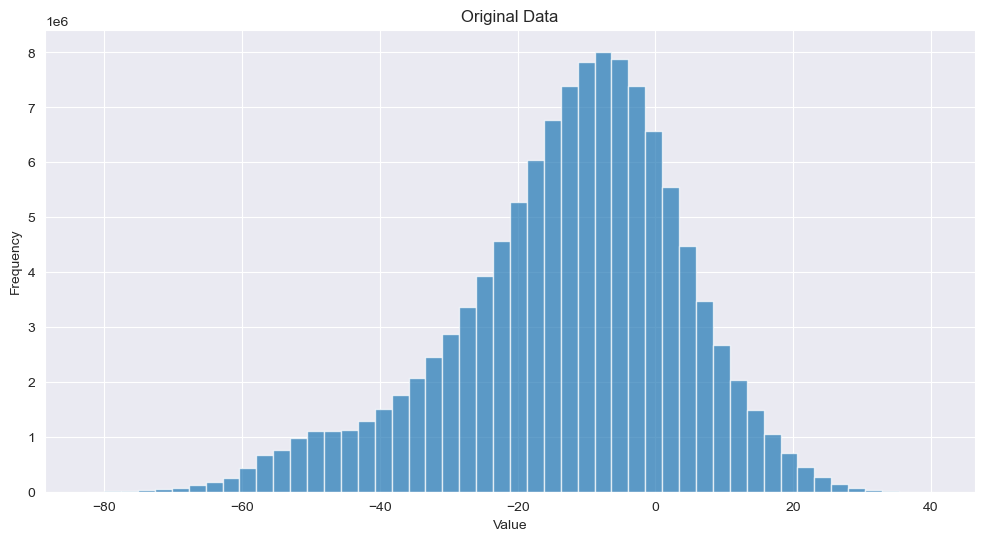

In [7]:
plt.figure(figsize=(12, 6))
plt.title("Original Data")
plt.hist(x_train.flatten(), bins=50, alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")

In [8]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
x_validation = (x_validation - mean) / std

Text(0, 0.5, 'Frequency')

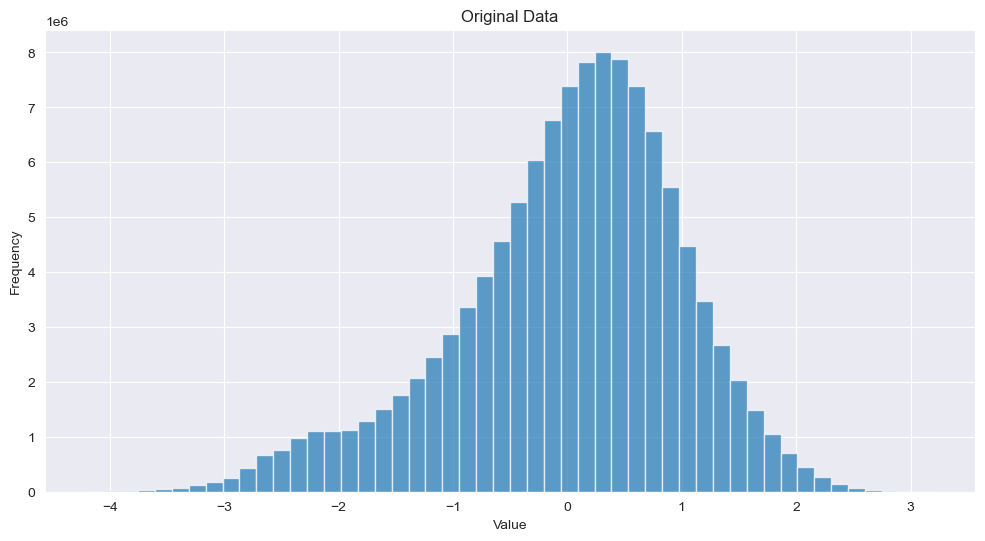

In [9]:
plt.figure(figsize=(12, 6))
plt.title("Original Data")
plt.hist(x_train.flatten(), bins=50, alpha=0.7)
plt.xlabel("Value", )
plt.ylabel("Frequency")

In [17]:
def build_model(input_shape):

    model = keras.Sequential()

    model.add(keras.layers.Flatten(input_shape=input_shape))

    model.add(keras.layers.Dense(1024, activation="relu"))
    model.add(keras.layers.Dropout(0.4))

    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.35))

    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dropout(0.35))

    model.add(keras.layers.Dense(10, activation="softmax"))

    return model

In [19]:
input_shape = (x_train.shape[1], x_train.shape[2])
model = build_model(input_shape)

optimizer = keras.optimizers.Adam(learning_rate=0.00002)

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16640)             0         
                                                                 
 dense (Dense)               (None, 1024)              17040384  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

Epoch 1/55
219/219 [==============================] - 4s 10ms/step - loss: 2.3022 - accuracy: 0.1849 - val_loss: 2.0028 - val_accuracy: 0.3400
Epoch 2/55
219/219 [==============================] - 2s 9ms/step - loss: 2.1241 - accuracy: 0.2469 - val_loss: 1.9205 - val_accuracy: 0.4027
Epoch 3/55
219/219 [==============================] - 2s 9ms/step - loss: 2.0451 - accuracy: 0.2713 - val_loss: 1.8161 - val_accuracy: 0.3920
Epoch 4/55
219/219 [==============================] - 2s 9ms/step - loss: 1.9999 - accuracy: 0.2946 - val_loss: 1.7684 - val_accuracy: 0.4140
Epoch 5/55
219/219 [==============================] - 2s 9ms/step - loss: 1.9366 - accuracy: 0.3141 - val_loss: 1.7361 - val_accuracy: 0.4180
Epoch 6/55
219/219 [==============================] - 2s 9ms/step - loss: 1.9035 - accuracy: 0.3355 - val_loss: 1.6911 - val_accuracy: 0.4440
Epoch 7/55
219/219 [==============================] - 2s 9ms/step - loss: 1.8634 - accuracy: 0.3453 - val_loss: 1.6692 - val_accuracy: 0.4580
Epoch

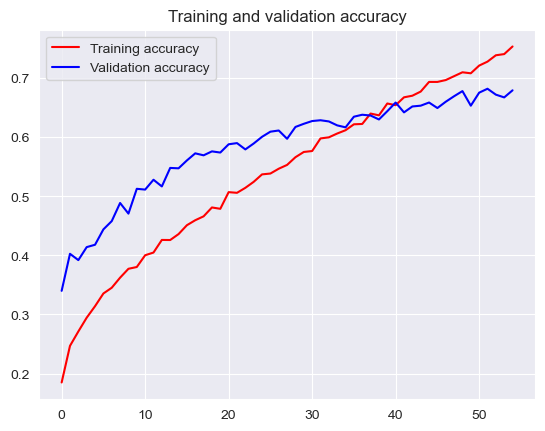

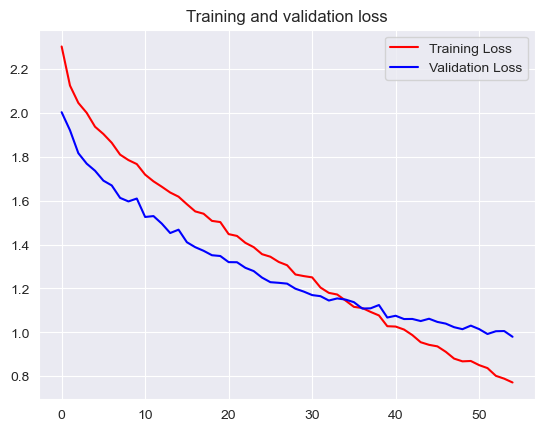

In [12]:
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    epochs=55,
                    batch_size=32,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=4,
                                                                verbose=1,
                                                                restore_best_weights=True)]
                    )

test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy' + str())
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
del model
keras.backend.clear_session()
gc.collect()

1371